# Bibliotheken importieren

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import sqlalchemy as db
from sklearn.metrics import mean_squared_error
import os

ModuleNotFoundError: No module named 'GitPython'

# Daten einladen


In [2]:
path = '/Users/simonschuster/Documents/Master_DataScience/Programmieren_python/Datensatz/'
test = 'test.csv'
train = 'train.csv'
ideal = 'ideal.csv'
test_data = pd.read_csv(path + test)
train_data = pd.read_csv(path + train)
ideal_data = pd.read_csv(path + ideal)

# Daten in eine SQL Datenbank laden


In [3]:
print('SQLAlchemy-Version: ', db.__version__)
engine = db.create_engine('sqlite:///sqlalchemy.sqlite',echo=False) # Eine engine erzeugen
connection = engine.connect() # ein DB Verbindungsobjekt erzeugen
ideal_data.to_sql('ideal_data', con=engine) # Eine SQL Tabelle mit dem Namen 'ideal_data erzeugen'
train_data.to_sql('train_data', con=engine) # Eine SQL Tabelle mit dem Namen 'train_data erzeugen'

SQLAlchemy-Version:  1.3.20


# Erstellen einer Funktion zum finden der idealen Funktion

In [4]:
def find_ideal_function (test,ideal):
    a = []
    for column in ideal.columns[1:]:
        MSE=mean_squared_error(test,ideal[column])
        a.append(MSE)
    amin = np.argmin(a)
    amin.astype('int64')
    return (print('Die ideale Funktion ist y',amin+1))
   

In [39]:
find_ideal_function(train_data['y1'],ideal_data)
find_ideal_function(train_data['y2'],ideal_data)
find_ideal_function(train_data['y3'],ideal_data)
find_ideal_function(train_data['y4'],ideal_data)

die ideale Funktion ist y 36
die ideale Funktion ist y 11
die ideale Funktion ist y 2
die ideale Funktion ist y 33


# Visualisierung der Trainingsfunktionen mit den dazugehörigen idealen Funktionen

Text(0.5, 1.0, 'Train Function y4')

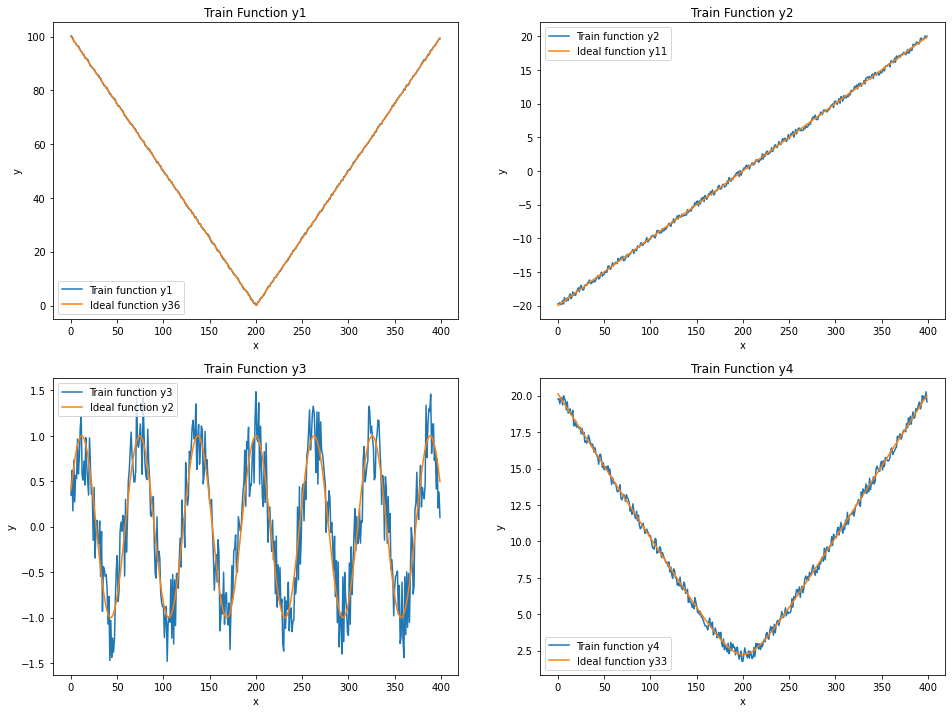

In [38]:
plt.subplots(2,2, figsize=(16,12))
plt.subplot(2,2,1)
sns.lineplot(data=train_data['y1'], label ='Train function y1')
sns.lineplot(data=ideal_data['y36'], label ='Ideal function y36')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Function y1')
plt.subplot(2,2,2)
sns.lineplot(data=train_data['y2'], label ='Train function y2')
sns.lineplot(data=ideal_data['y11'], label ='Ideal function y11')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Function y2')
plt.subplot(2,2,3)
sns.lineplot(data=train_data['y3'], label ='Train function y3')
sns.lineplot(data=ideal_data['y2'], label ='Ideal function y2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Function y3')
plt.subplot(2,2,4)
sns.lineplot(data=train_data['y4'], label ='Train function y4')
sns.lineplot(data=ideal_data['y33'], label ='Ideal function y33')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Function y4')

In [42]:
pip install GitPython

     |████████████████████████████████| 181 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.
